### Problem Statement

Dataset includes house sale prices for King County in USA in period of May 2014 - May 2015.

Consist of columns:
- ida: notation for a house
- date: date house was sold
- price: price is prediction target
- bedrooms: number of bedrooms/house
- bathrooms: number of bathrooms/house
- sqft_living: square footage of the house
- sqft_lot: square footage of the lot
- floors: total floors (leves) in the house
- waterfront: access of view to a waterfront
- view: has been viewed
- condition: overall condition
- grade: overall grade given to the housing unit, based on King County grading system
- sqft_abovesquare: footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: built year
- yr_renovated: year when house was renovated
- zipcode: zip
- lat: latitude coordinate
- long: longitude coordinate
- sqft_living15: living room area in 2015 (implies some renovations)
- sqft_lot15: lot size area in 2015 (implies some renovations)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Data Understanding

In [2]:
house_df = pd.read_csv('kc_house_data.csv', encoding='ISO-8859-1')

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
display(house_df.shape, house_df.columns)

(21613, 21)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
house_df.describe(include='object').T

,count,unique,top,freq
date,21613,372,20140623T000000,142


In [9]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
house_df.duplicated().sum()

0

### Visualize Dataset

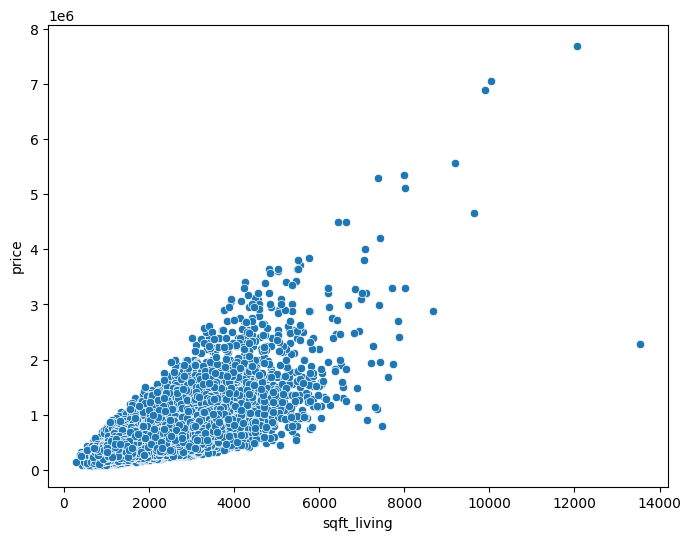

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sqft_living', y='price', data=house_df)
plt.show()

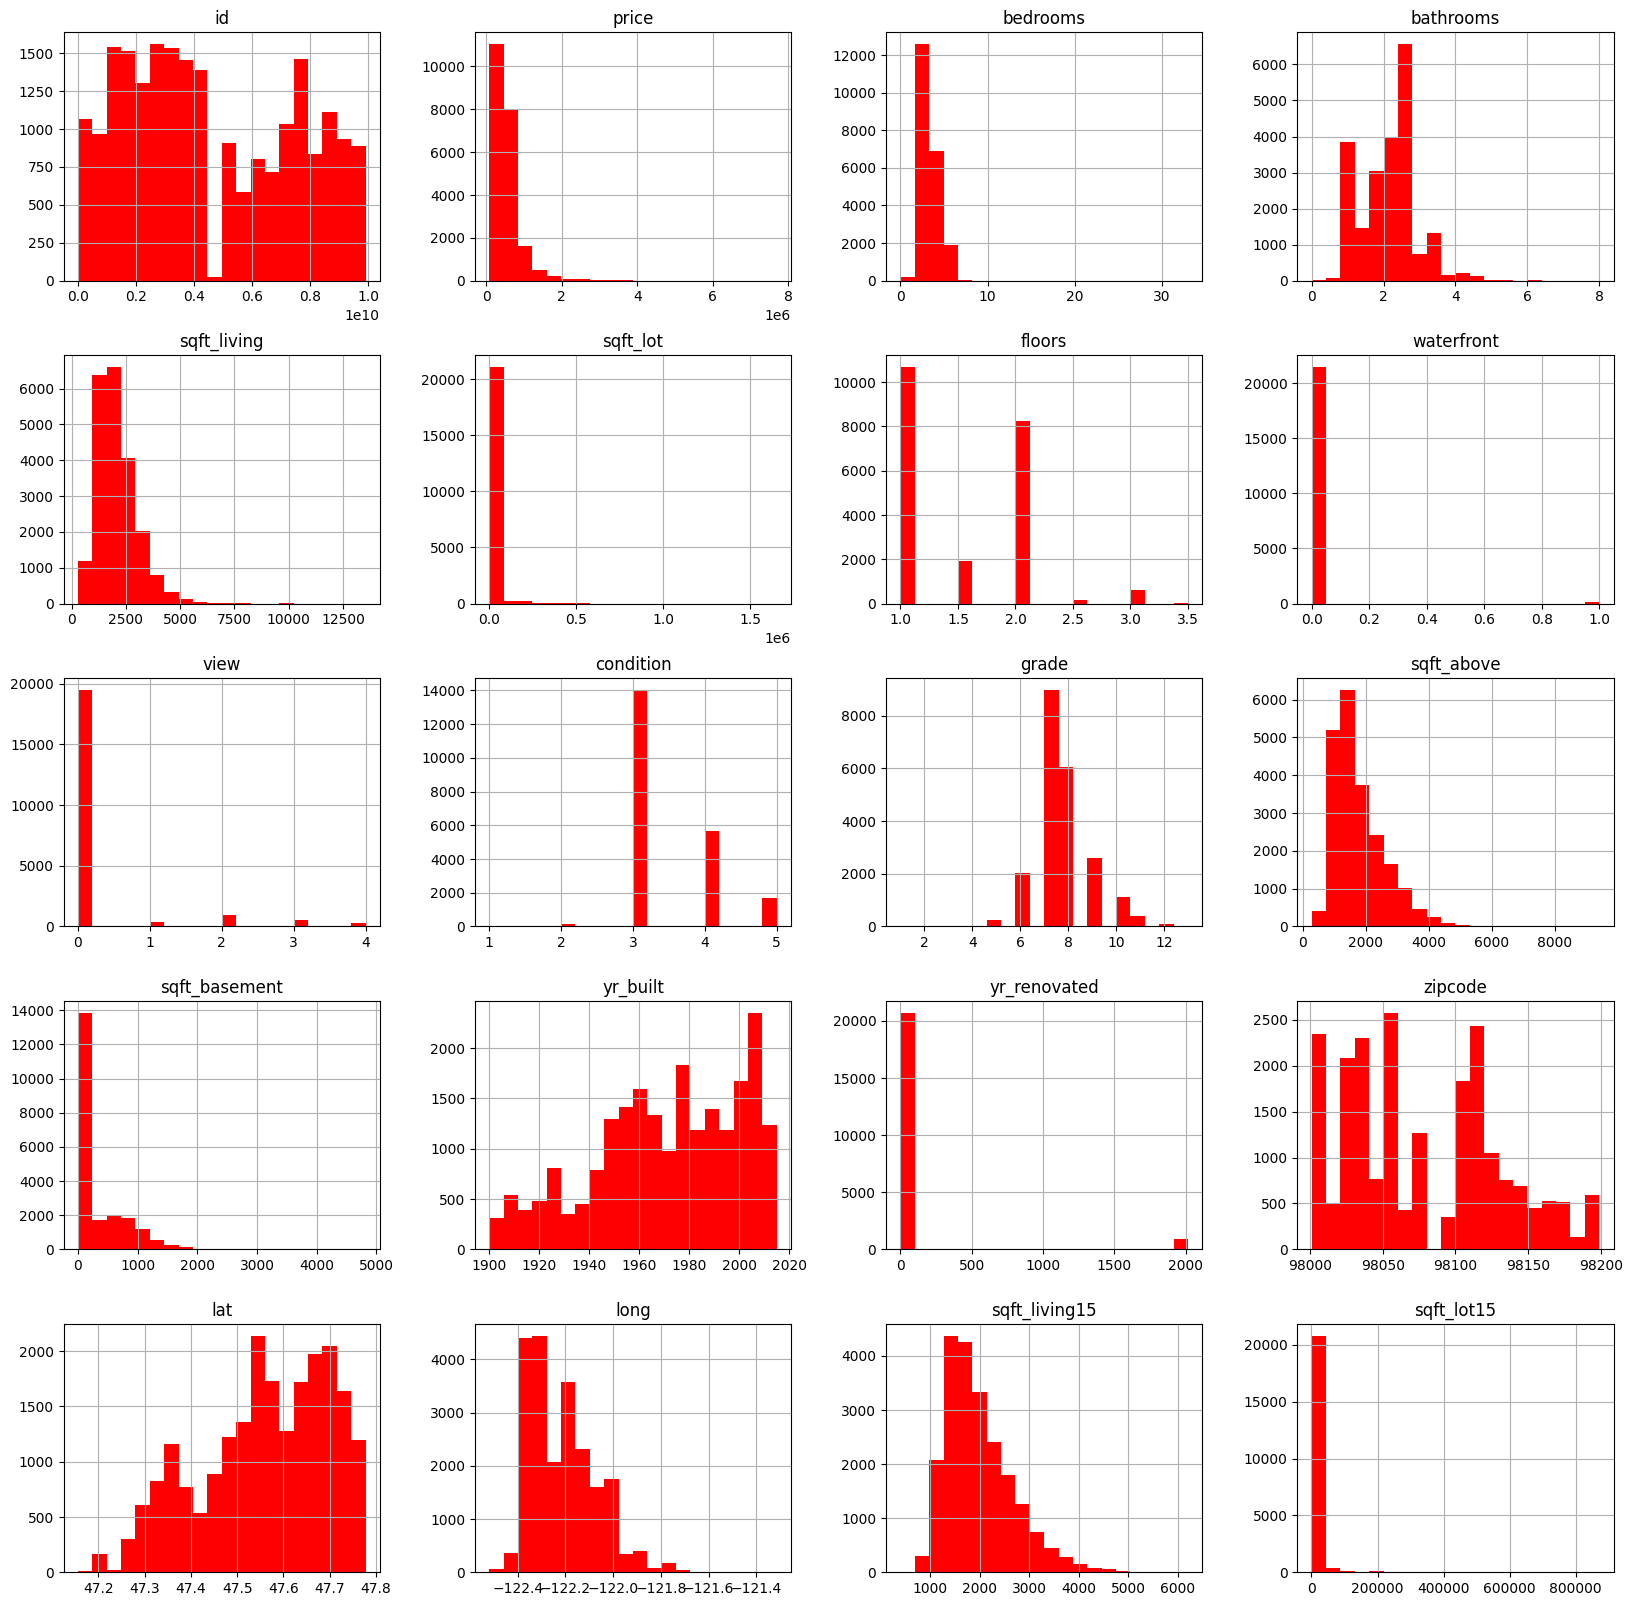

In [12]:
house_df.hist(bins=20, figsize=(20,20), color='red')
plt.show()

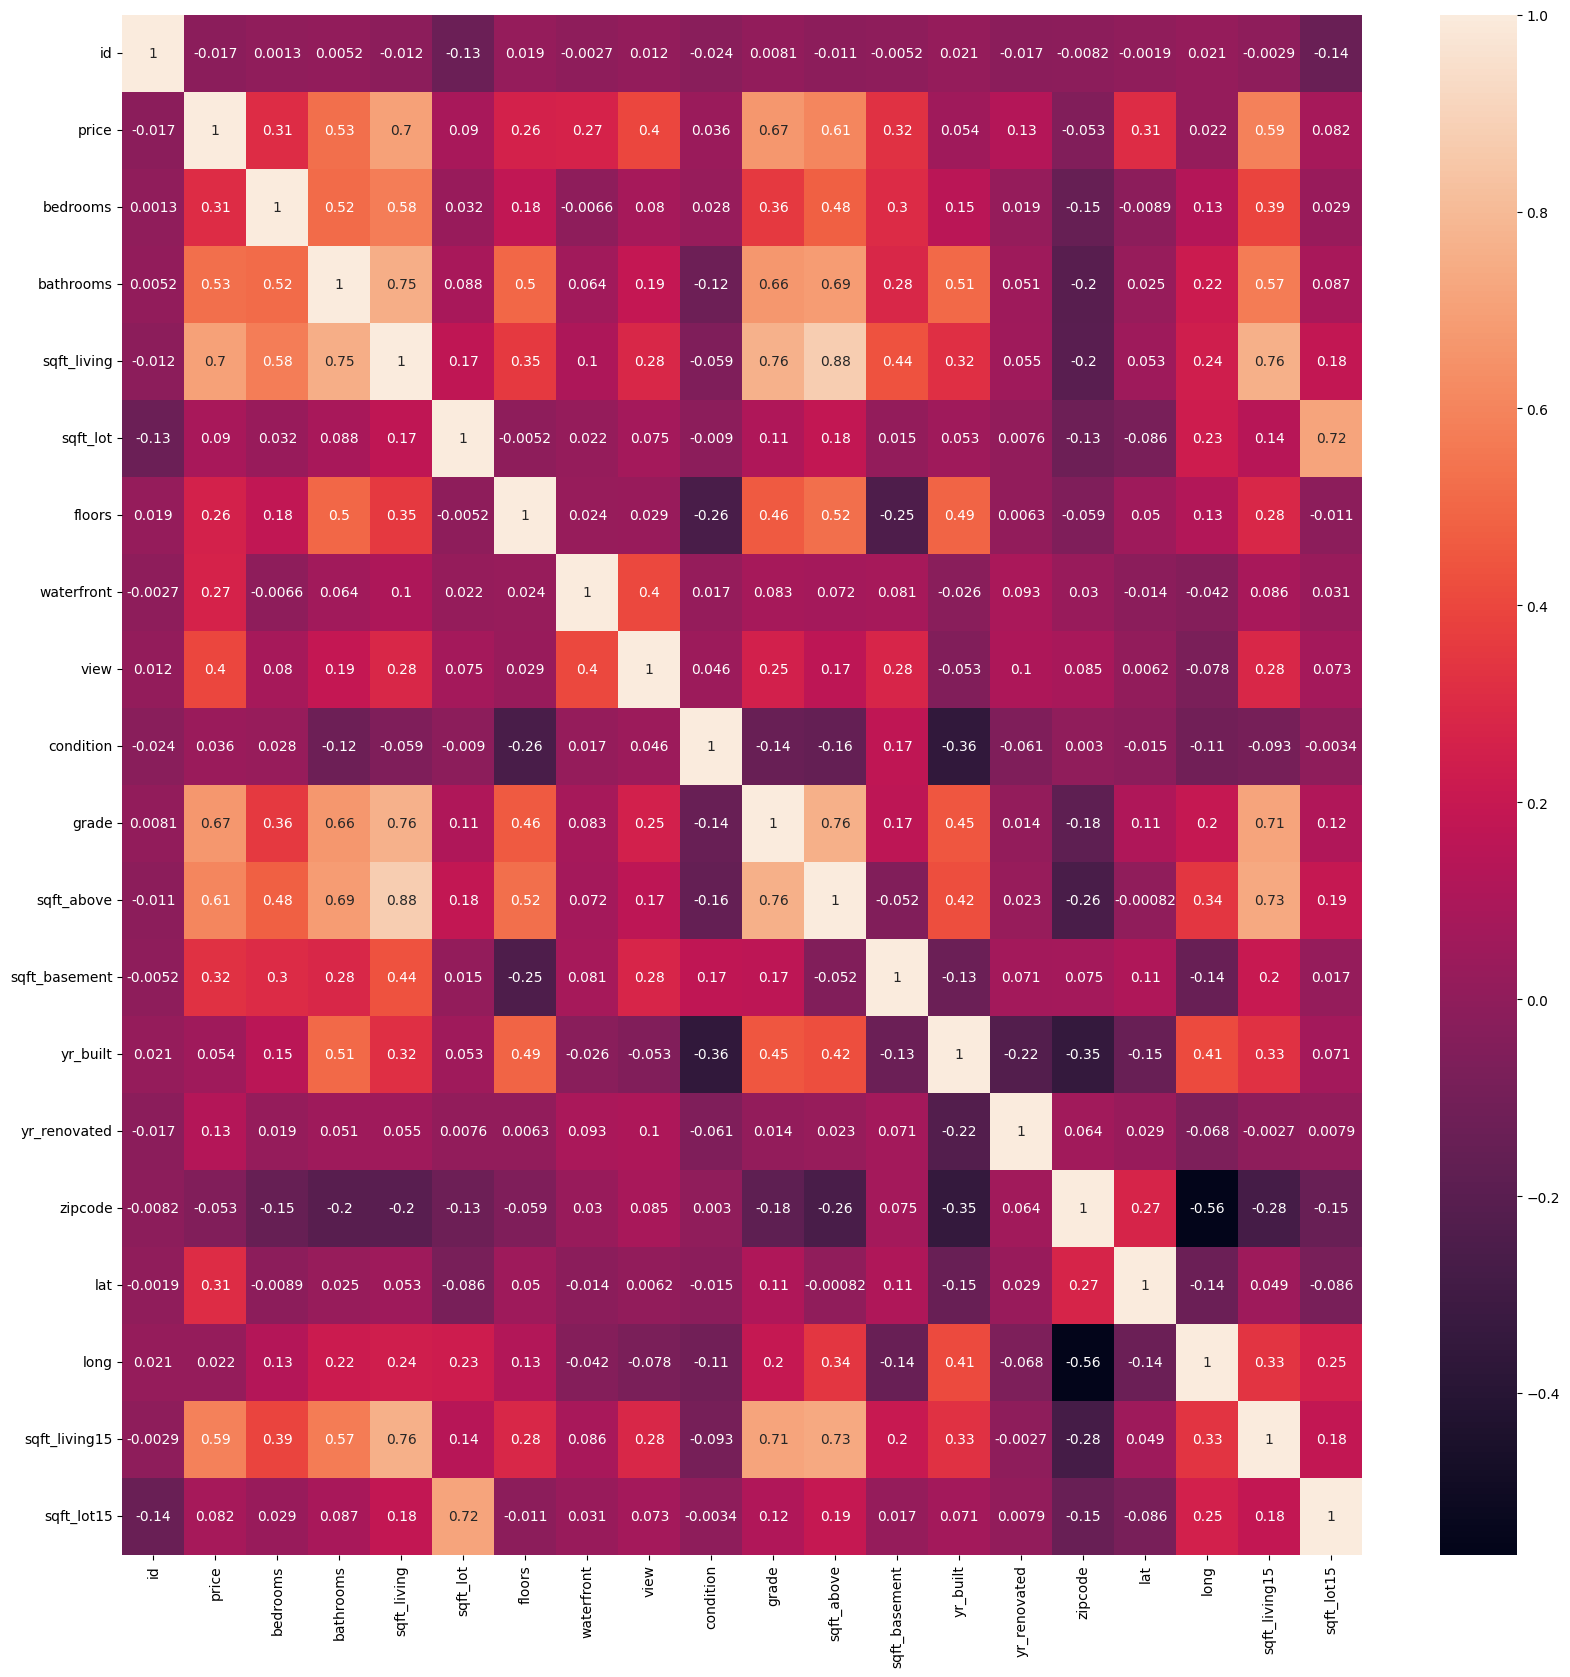

In [13]:
numeric_df = house_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

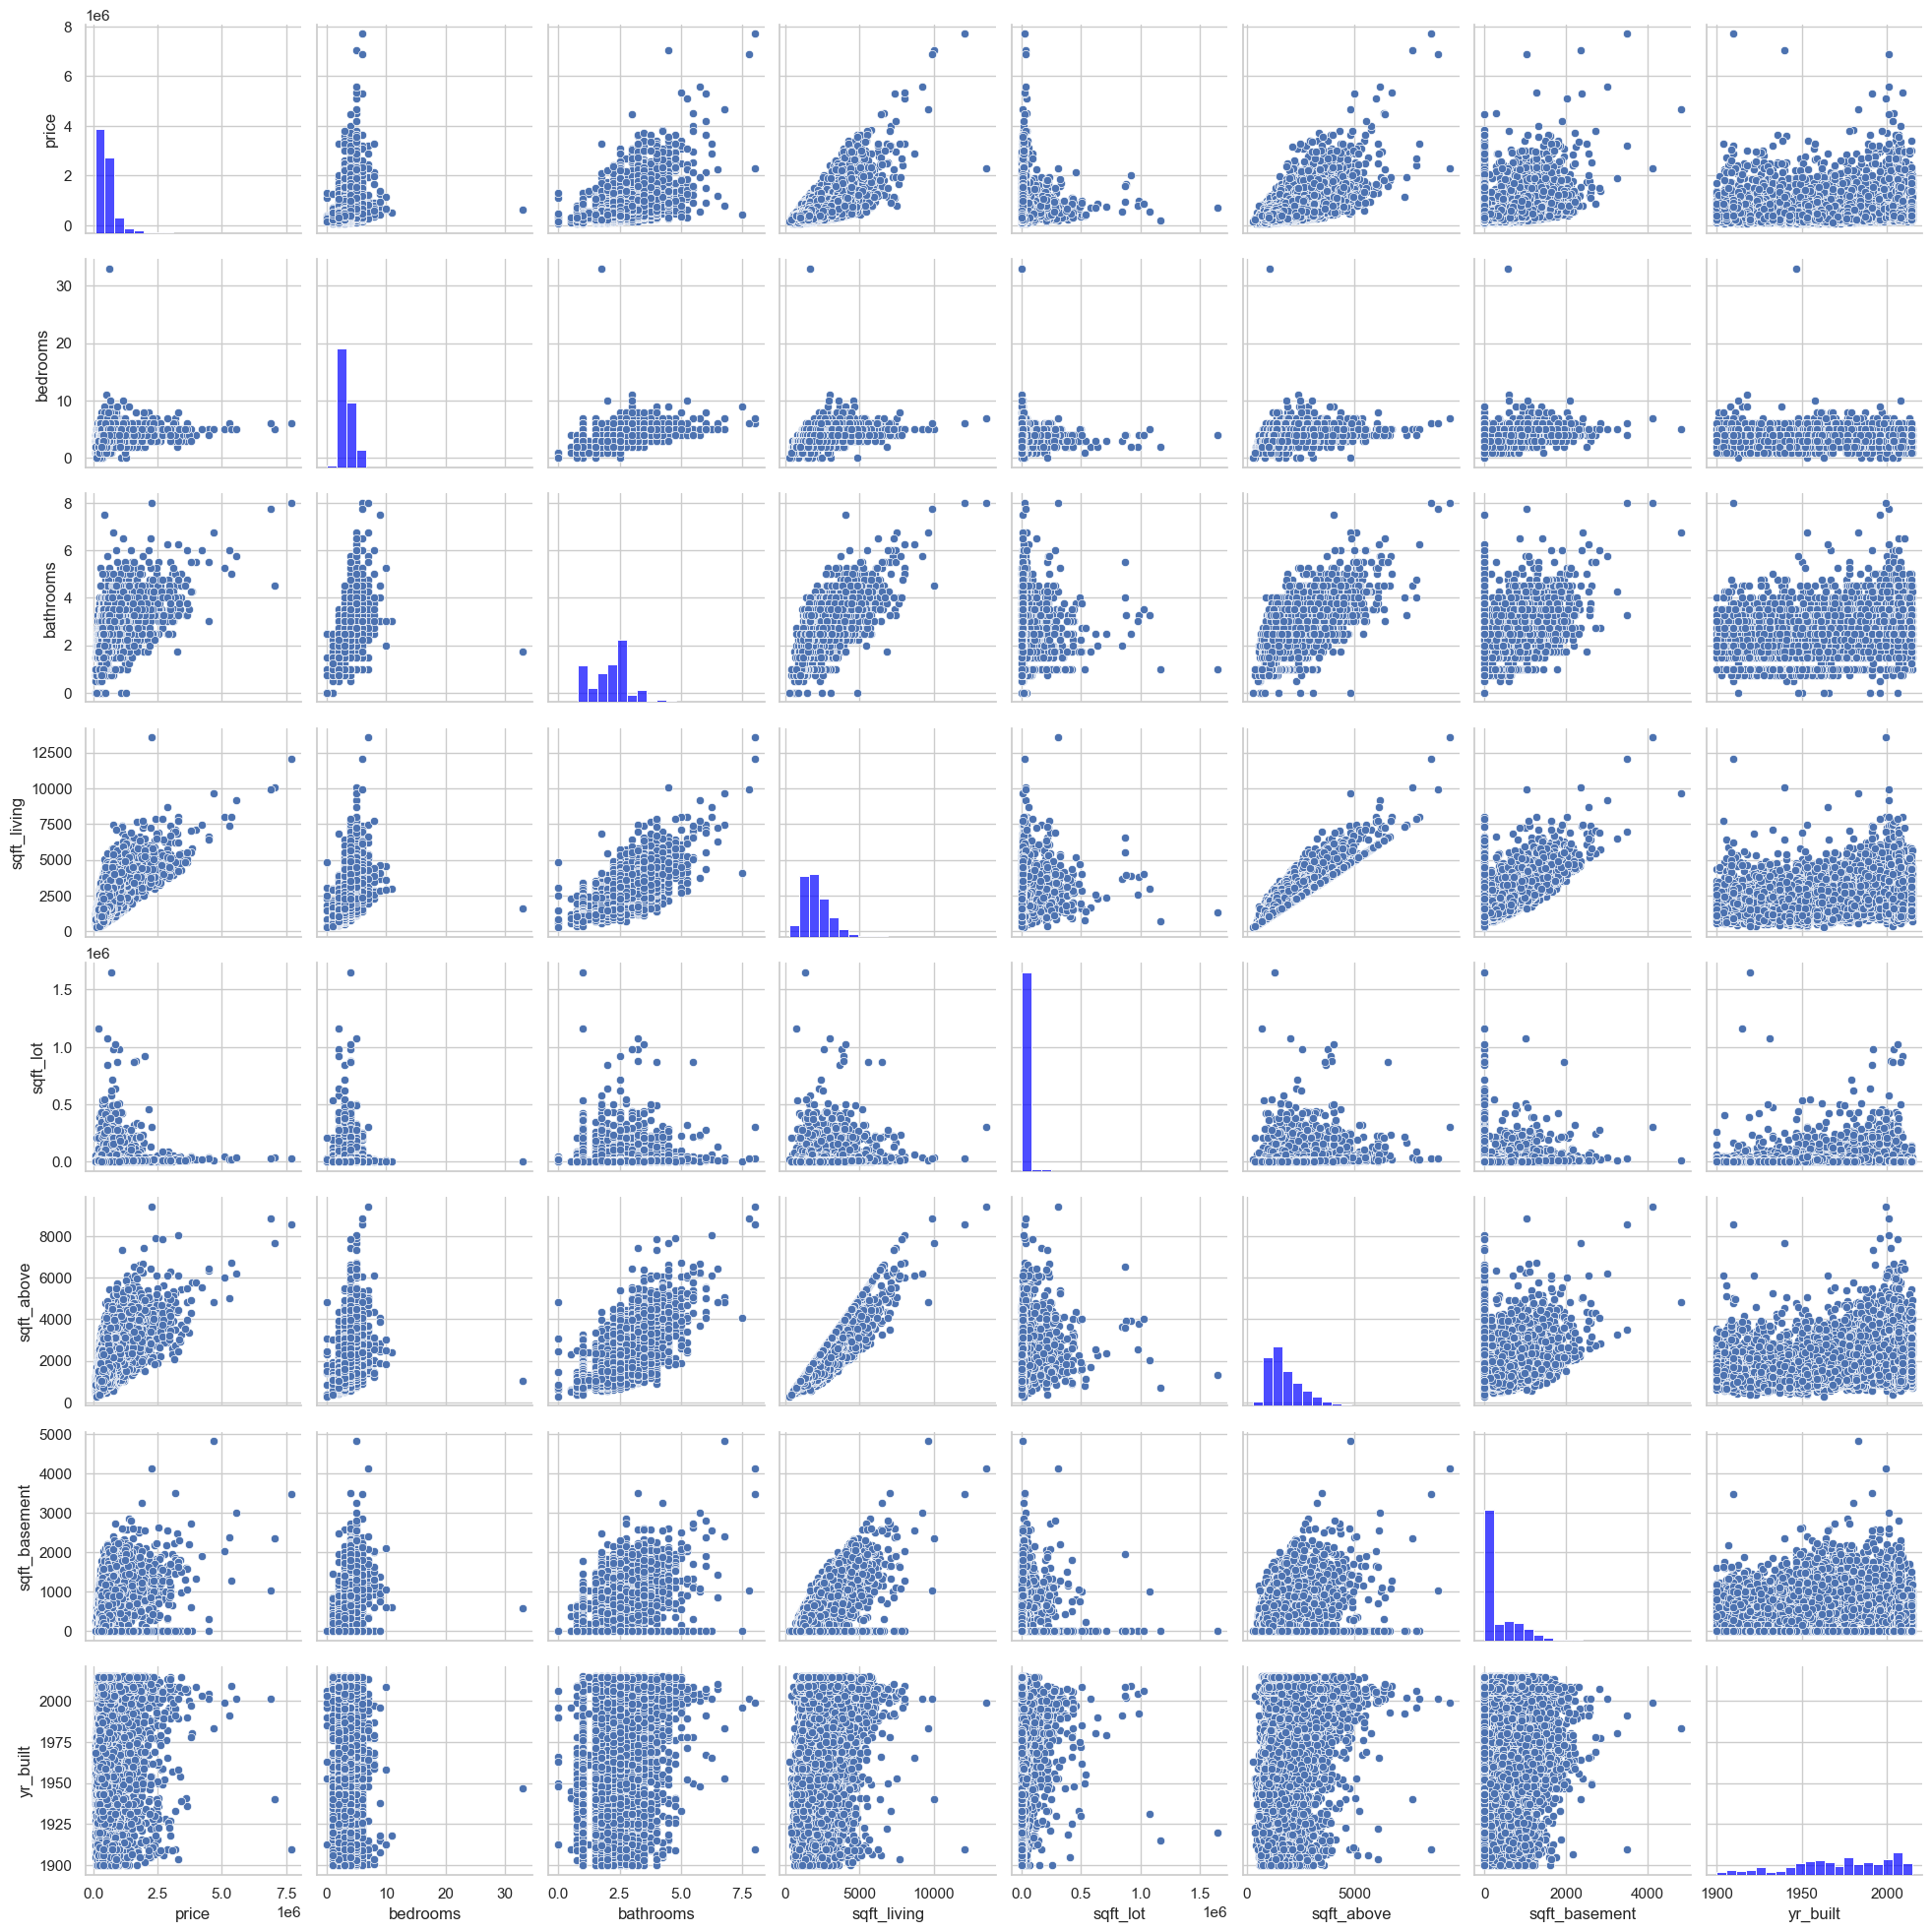

In [14]:
sns.set(style="whitegrid")
house_df_pairplot = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']]
sns.pairplot(house_df_pairplot, diag_kind='hist', diag_kws={'bins': 20, 'alpha': 0.7, 'color': 'blue'})
plt.show()

### Data Preprocessing

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']
X = house_df[selected_features]
y = house_df['price']

In [17]:
display(X.head())
display(y.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [18]:
display(X.shape, y.shape)

(21613, 7)

(21613,)

In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
display(X_scaled, X_scaled.shape)

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

(21613, 7)

In [21]:
display(scaler.data_max_, scaler.data_min_)

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [22]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [23]:
display(y_scaled, y_scaled.shape)

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

(21613, 1)

### Create Training and Testing Set

In [24]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 42)

In [26]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16209, 7)

(16209, 1)

(5404, 7)

(5404, 1)

### Train the ANN Model

In [27]:
model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21101 (82.43 KB)
Trainable params: 21101 (82.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [31]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5047e-04 - val_loss: 9.0620e-04
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5514e-04 - val_loss: 8.8692e-04
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5524e-04 - val_loss: 9.0294e-04
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 8.4118e-04 - val_loss: 8.4660e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5063e-04 - val_loss: 8.8329e-04
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5567e-04 - val_loss: 9.0497e-04
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 8.5454e-04 - val_loss: 8.9492e-04
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 8.3619e-04 - val_loss: 9.5363e-04
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 8.4401e-04 - val_loss: 8.6700e-04
Epoch 10/100
260/26

### Evaluating the ANN Model

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [33]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

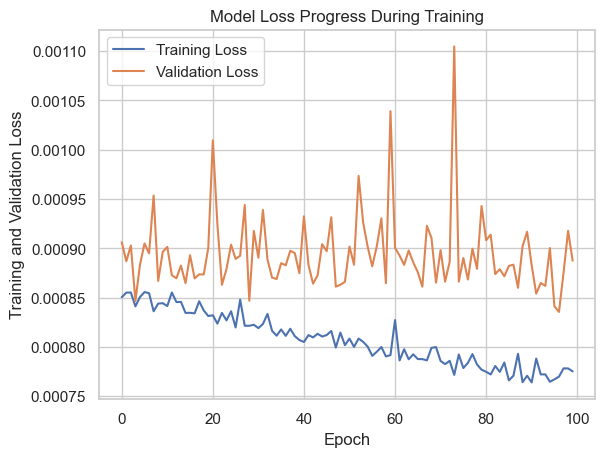

In [34]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [35]:
X_test_1 = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)
y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 [==============================] - 0s 140ms/step


array([[214643.97]], dtype=float32)

169/169 [==============================] - 0s 2ms/step


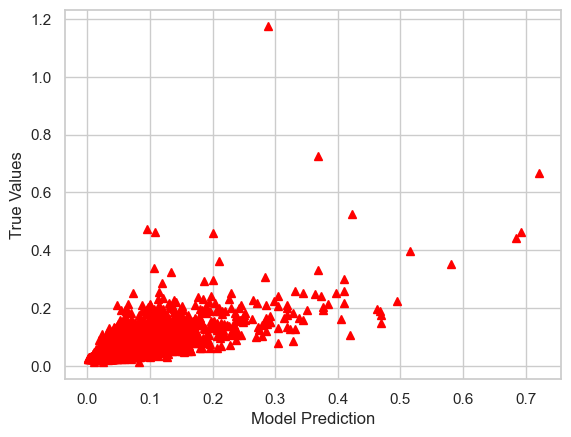

In [36]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'red')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.show()

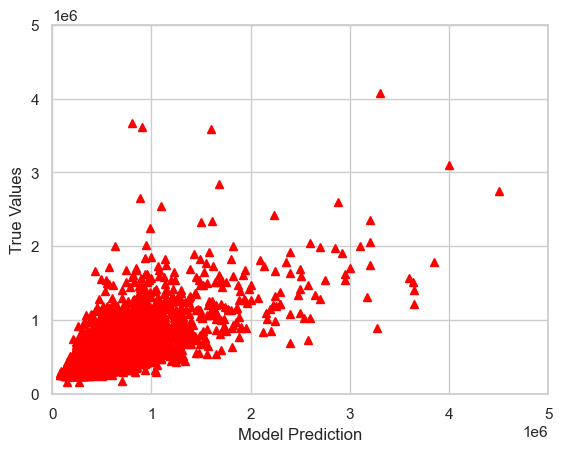

In [37]:
y_predict_og = scaler.inverse_transform(y_predict)
y_test_og = scaler.inverse_transform(y_test)
plt.plot(y_test_og, y_predict_og, '^', color = 'red')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.show()

In [38]:
r2 = r2_score(y_test_og, y_predict_og)
mae = mean_absolute_error(y_test_og, y_predict_og)
mse = mean_squared_error(y_test_og, y_predict_og)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_og, y_predict_og)
n = len(y_test_og)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.48661581816529187
Mean Absolute Error: 164128.22872524982
Mean Squared Error: 76795920123.53246
Root Mean Squared Error: 277120.76812020503
Mean Absolute Percentage Error: 0.3295246310968151
Adjusted R-squared: 0.48594982682488364


### Multiple Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
print('Linear Model Coefficient (m):', lr.coef_)
print('Linear Model Coefficient (b):', lr.intercept_)

Linear Model Coefficient (m): [[-5.83568658e+04  8.12694425e+03  2.12107555e+02 -3.70490730e-01
   9.57461394e+03  8.93077706e+01  1.22799784e+02]]
Linear Model Coefficient (b): [73410.82365585]


In [43]:
y_predict = lr.predict(X_test)
y_predict

array([[ 498053.16204432],
       [ 723029.43628782],
       [1011749.96965177],
       ...,
       [ 570263.87458131],
       [1359849.26304949],
       [ 379139.41312571]])

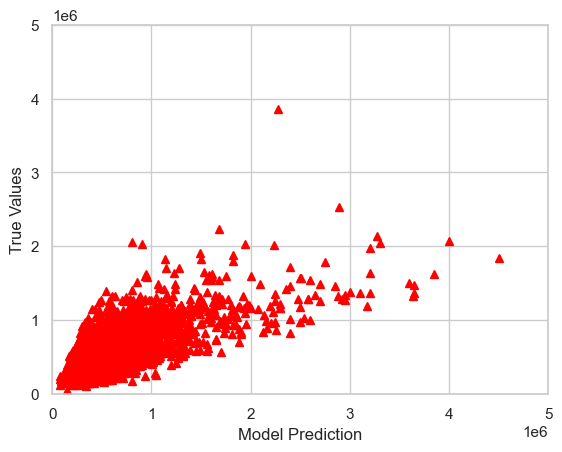

In [44]:
plt.plot(y_test, y_predict, '^', color = 'red')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.show()

In [45]:
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_predict)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.5129113533507279
Mean Absolute Error: 174272.1761632357
Mean Squared Error: 72862433484.95024
Root Mean Squared Error: 269930.4234149057
Mean Absolute Percentage Error: 0.35049542387708943
Adjusted R-squared: 0.5122794740833919


### Re-train the ANN Model by Increasing Number of Features

In [58]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = house_df[selected_features]
y = house_df['price']

In [59]:
display(X.head())
display(y.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [60]:
display(X.shape, y.shape)

(21613, 17)

(21613,)

In [61]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [62]:
display(X_scaled, X_scaled.shape)
display(y_scaled, y_scaled.shape)

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

(21613, 17)

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

(21613, 1)

In [63]:
display(scaler.data_max_, scaler.data_min_)

array([7700000.])

array([75000.])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 42)

In [65]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16209, 17)

(16209, 1)

(5404, 17)

(5404, 1)

In [75]:
model = Sequential()
model.add(Dense(50, input_dim = 17, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                900       
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 100)               5100      
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 8651 (33.79 KB)
Trainable params: 8651 (33.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [78]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 2s 3ms/step - loss: 9.5012e-04 - val_loss: 4.9236e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 5.6681e-04 - val_loss: 6.2174e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 4.8323e-04 - val_loss: 5.1939e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 4.7257e-04 - val_loss: 3.9929e-04
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 4.2565e-04 - val_loss: 4.1339e-04
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 3.9133e-04 - val_loss: 3.6181e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 3.7254e-04 - val_loss: 3.7568e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 3.4902e-04 - val_loss: 3.4350e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 3.4149e-04 - val_loss: 3.4922e-04
Epoch 10/100
260/26

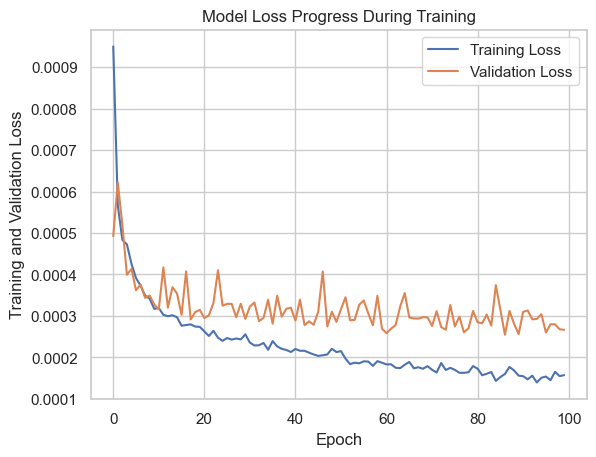

In [79]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

169/169 [==============================] - 0s 1ms/step


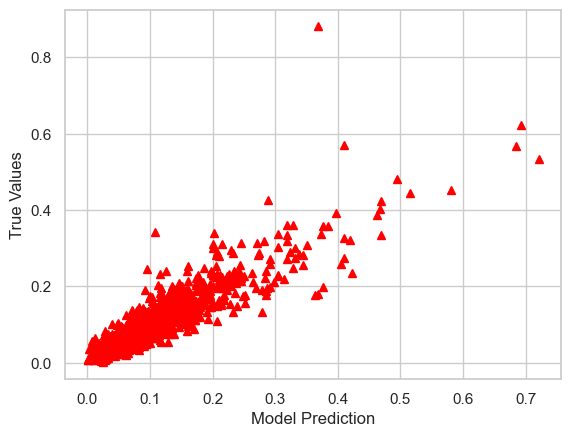

In [80]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'red')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.show()

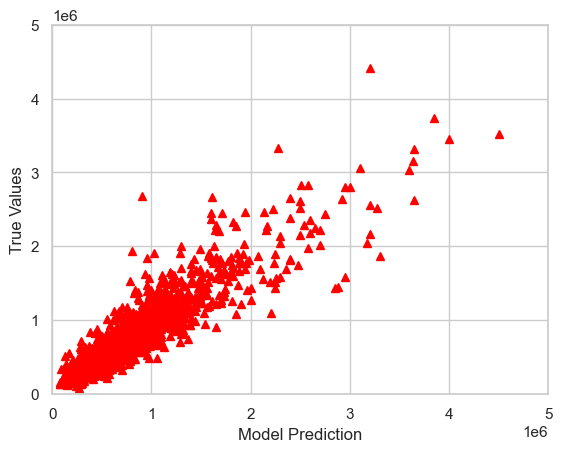

In [81]:
y_predict_og = scaler.inverse_transform(y_predict)
y_test_og = scaler.inverse_transform(y_test)
plt.plot(y_test_og, y_predict_og, '^', color = 'red')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.show()

In [82]:
r2 = r2_score(y_test_og, y_predict_og)
mae = mean_absolute_error(y_test_og, y_predict_og)
mse = mean_squared_error(y_test_og, y_predict_og)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_og, y_predict_og)
n = len(y_test_og)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2) * (n-1) / (n-p-1))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Adjusted R-squared: {adjusted_r2}')

R-squared: 0.857106602934436
Mean Absolute Error: 78277.0194054751
Mean Squared Error: 21375083797.888397
Root Mean Squared Error: 146202.20175458505
Mean Absolute Percentage Error: 0.14215716427992736
Adjusted R-squared: 0.8566555840428439
